In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/10 pipe dataset.csv')
pd.set_option('display.max_columns',None)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.shape

(12316, 32)

In [ ]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

<Axes: xlabel='Accident_severity'>

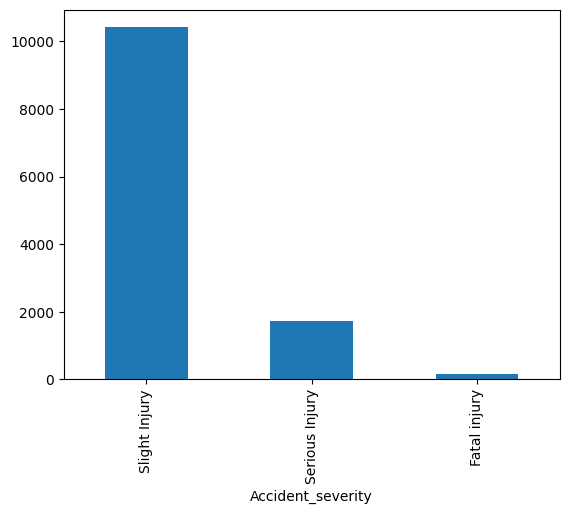

In [ ]:
df['Accident_severity'].value_counts().plot(kind='bar')

* See the data is highly imbalanced

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-6-1bfd8981fe14>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [ ]:
df['Hour_of_the_day'] = df['Time'].dt.hour

In [ ]:
# Drop the time
df.drop('Time',axis=1,inplace=True)

In [ ]:
df.head(2)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_the_day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17


## Encode Target Feature/column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Accident_severity'] = le.fit_transform(df['Accident_severity'])

In [ ]:
df['Accident_severity'].value_counts()

Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64

## Balance Dataset

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Accident_severity',axis=1)
y = df['Accident_severity']

oversampler = RandomOverSampler(random_state=42)
X_resampled , y_resampled = oversampler.fit_resample(X,y)

In [ ]:
X_resampled.shape

(31245, 31)

In [ ]:
y_resampled.value_counts()

Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_resampled,
                                                       y_resampled,
                                                       test_size=0.2,
                                                       random_state=42)

# **Pipeline**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Numerical Columns
num_cols = ['Number_of_vehicles_involved','Number_of_casualties','Hour_of_the_day']
# Categorical Columns
cat_cols = ['Day_of_week','Age_band_of_driver','Sex_of_driver','Educational_level','Vehicle_driver_relation',
            'Driving_experience','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle',
            'Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions',
            'Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Casualty_class','Sex_of_casualty',
            'Age_band_of_casualty','Casualty_severity','Work_of_casuality','Fitness_of_casuality','Pedestrian_movement','Cause_of_accident']

In [ ]:
# Numerical Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
]
                        )

In [ ]:
# Categorical Pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))
]
                         )

In [ ]:
# Column Transformer
col_transformer = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)],
                             remainder='passthrough',
                             n_jobs= -1
                                     )

In [ ]:
# Best feature selection
from sklearn.feature_selection import SelectKBest , chi2 , mutual_info_classif

feature_selection = SelectKBest(mutual_info_classif,k=50)

In [ ]:
# MODEL ( randomforest)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
final_pipeline = make_pipeline(col_transformer, feature_selection, rf )

In [ ]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Number_of_vehicles_involved',
                                                   'Number_of_casualties',
                                                   'Hour_of_the_day']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))...
                                                   'Type_of_collision',
                                                   'Vehicle_movement',
                                                   'Casualty_class',
                                                   'Sex_of_casualty',
                                                   'Age_band_of_casualty',
                                                   'Casualty_severity',
                                                   'Work_of_casuality',
                                                   'Fitness_of_casuality',
                                                   'Pedestrian_movement',
                                                   'Cause_of_accident'])])),
                ('selectkbest',
                 SelectKBest(k=50,
                             score_func=<function mutual_info_classif at 0x7ef42108a440>)),
                ('randomforestclassifier', RandomForestClassifier())])

## Accuracy Score

In [ ]:
final_pipeline.score(X_test,y_test)

0.9787165946551448

In [ ]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
y_pred = final_pipeline.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {accuracy}')
print('------------------------------------------------------')
print('CLASSIFICATION REPORT')
print('---------------------------------------------------------')
print(classification_report(y_test,y_pred))
print('------------------------------------------------')

Accuracy Score : 0.9787165946551448
------------------------------------------------------
CLASSIFICATION REPORT
---------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2085
           1       0.95      0.99      0.97      2100
           2       0.99      0.94      0.97      2064

    accuracy                           0.98      6249
   macro avg       0.98      0.98      0.98      6249
weighted avg       0.98      0.98      0.98      6249

------------------------------------------------


## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

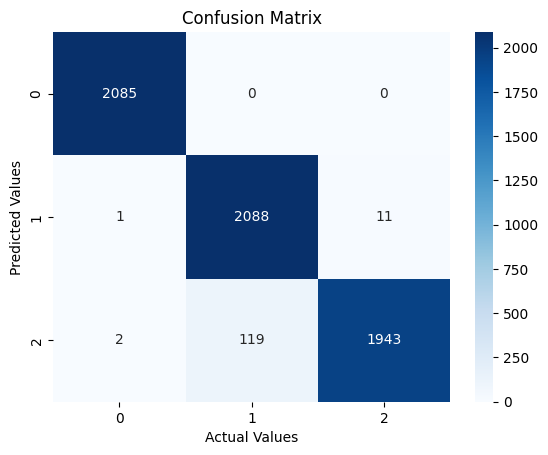

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
matrix =(confusion_matrix(y_test,y_pred))
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix')

## Save the Pipeline

In [ ]:
import pickle
pickle.dump(final_pipeline,open('final_pipeline.pkl','wb'))